In [2]:
def create_n_dimensional_vector():
    vector_str = input("n차원 벡터를 입력하세요 (콤마로 구분): ")
    vector_str_list = vector_str.split(',')
    vector = []
    for num_str in vector_str_list:
        try:
            num = float(num_str)
            vector.append(num)
        except ValueError:
            print("올바른 숫자를 입력하세요.")
            return None
    return vector

n_dimensional_vector = create_n_dimensional_vector()
if n_dimensional_vector is not None:
    print("벡터:", n_dimensional_vector)

n차원 벡터를 입력하세요 (콤마로 구분): 2.3, 4.5, 6.5
벡터: [2.3, 4.5, 6.5]


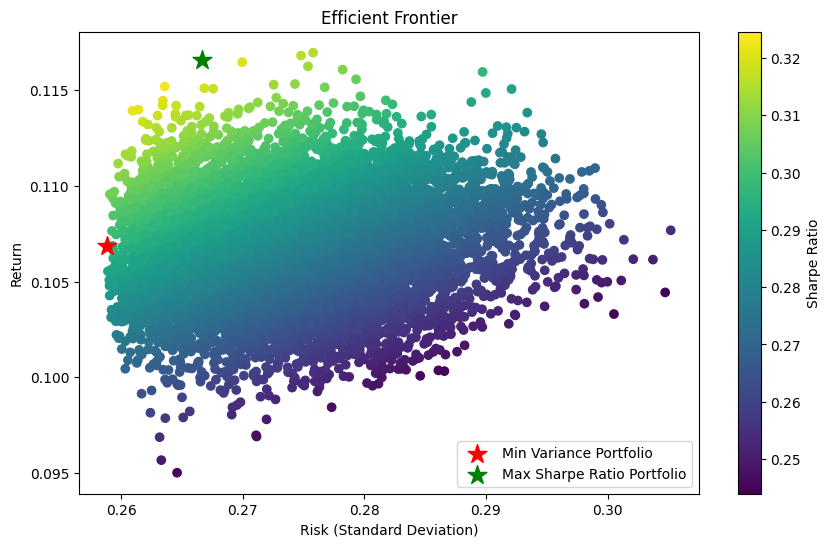

Max Sharpe Ratio Portfolio:
Return: 0.11655602583996133
Risk: 0.26664619714801024
Sharpe Ratio: 0.32461001419013574


In [4]:
import numpy as np
import matplotlib.pyplot as plt

# 위험자산의 예상 수익률과 공분산 행렬 정의
np.random.seed(0)
n_assets = 5  # 위험자산 개수

# 무작위로 예상 수익률과 공분산 행렬 생성
mean_returns = np.random.uniform(0.05, 0.15, n_assets)
cov_matrix = np.random.uniform(0, 0.2, (n_assets, n_assets))
cov_matrix = np.dot(cov_matrix, cov_matrix.T)

# Efficient Frontier 계산
returns = []
risks = []
sharpe_ratios = []
weights_list = []

for i in range(10000):
    weights = np.random.random(n_assets)
    weights /= np.sum(weights)
    returns.append(np.sum(weights * mean_returns))
    risks.append(np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))))
    sharpe_ratio = (np.sum(weights * mean_returns) - 0.03) / np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    sharpe_ratios.append(sharpe_ratio)
    weights_list.append(weights)

returns = np.array(returns)
risks = np.array(risks)
sharpe_ratios = np.array(sharpe_ratios)

# Efficient Frontier 시각화
plt.figure(figsize=(10, 6))
plt.scatter(risks, returns, c=sharpe_ratios, marker='o', cmap='viridis')
plt.title('Efficient Frontier')
plt.xlabel('Risk (Standard Deviation)')
plt.ylabel('Return')
plt.colorbar(label='Sharpe Ratio')

# 최소 분산 포트폴리오 찾기
min_variance_idx = np.argmin(risks)
plt.scatter(risks[min_variance_idx], returns[min_variance_idx], marker='*', color='r', s=200, label='Min Variance Portfolio')

# 최대 샤프 비율 포트폴리오 찾기
max_sharpe_idx = np.argmax(sharpe_ratios)
max_sharpe_return = returns[max_sharpe_idx]
max_sharpe_risk = risks[max_sharpe_idx]
max_sharpe_ratio = sharpe_ratios[max_sharpe_idx]

# 자산배분선 그리기
plt.scatter(max_sharpe_risk, max_sharpe_return, marker='*', color='g', s=200, label='Max Sharpe Ratio Portfolio')

plt.legend()
plt.show()

print("Max Sharpe Ratio Portfolio:")
print("Return:", max_sharpe_return)
print("Risk:", max_sharpe_risk)
print("Sharpe Ratio:", max_sharpe_ratio)


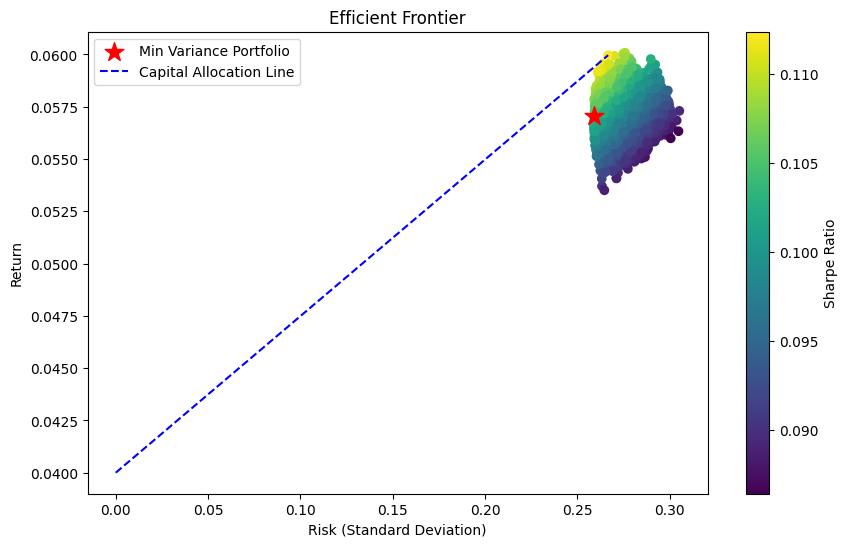

Max Sharpe Ratio Portfolio:
Return: 0.059966807751988406
Risk: 0.26664619714801024
Sharpe Ratio: 0.11238415575585502


In [16]:
import numpy as np
import matplotlib.pyplot as plt

# 위험자산의 예상 수익률과 공분산 행렬 정의
np.random.seed(0)
n_assets = 5  # 위험자산 개수

# 무작위로 예상 수익률과 공분산 행렬 생성
mean_returns = np.random.uniform(0.04, 0.07, n_assets)
cov_matrix = np.random.uniform(0, 0.2, (n_assets, n_assets))
cov_matrix = np.dot(cov_matrix, cov_matrix.T)

# Efficient Frontier 계산
returns = []
risks = []
sharpe_ratios = []
weights_list = []

for i in range(10000):
    weights = np.random.random(n_assets)
    weights /= np.sum(weights)
    returns.append(np.sum(weights * mean_returns))
    risks.append(np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))))
    sharpe_ratio = (np.sum(weights * mean_returns) - 0.03) / np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    sharpe_ratios.append(sharpe_ratio)
    weights_list.append(weights)

returns = np.array(returns)
risks = np.array(risks)
sharpe_ratios = np.array(sharpe_ratios)

# Efficient Frontier 시각화
plt.figure(figsize=(10, 6))
plt.scatter(risks, returns, c=sharpe_ratios, marker='o', cmap='viridis')
plt.title('Efficient Frontier')
plt.xlabel('Risk (Standard Deviation)')
plt.ylabel('Return')
plt.colorbar(label='Sharpe Ratio')

# 최소 분산 포트폴리오 찾기
min_variance_idx = np.argmin(risks)
plt.scatter(risks[min_variance_idx], returns[min_variance_idx], marker='*', color='r', s=200, label='Min Variance Portfolio')

# 최대 샤프 비율 포트폴리오 찾기
max_sharpe_idx = np.argmax(sharpe_ratios)
max_sharpe_return = returns[max_sharpe_idx]
max_sharpe_risk = risks[max_sharpe_idx]
max_sharpe_ratio = sharpe_ratios[max_sharpe_idx]

# 무위험 자산 수익률
risk_free_rate = 0.04

# 최대 샤프 비율 포트폴리오와 무위험 자산 사이의 자산배분선
x_values = np.linspace(0, max_sharpe_risk, num=100)
y_values = (max_sharpe_return - risk_free_rate) / max_sharpe_risk * x_values + risk_free_rate
plt.plot(x_values, y_values, linestyle='--', color='b', label='Capital Allocation Line')
plt.legend()
plt.show()

print("Max Sharpe Ratio Portfolio:")
print("Return:", max_sharpe_return)
print("Risk:", max_sharpe_risk)
print("Sharpe Ratio:", max_sharpe_ratio)


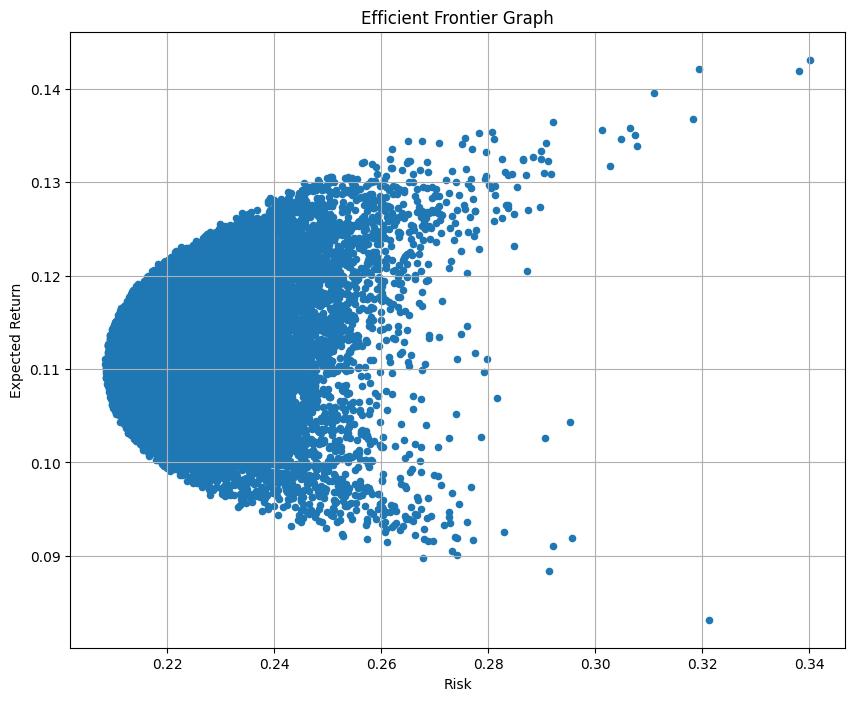

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 시가총액 5순위 주식과 연간 수익률, 연간 공분산 설정
stocks = ['Stock A', 'Stock B', 'Stock C', 'Stock D', 'Stock E']
annual_ret = [0.12, 0.08, 0.10, 0.15, 0.11]  # 연간 수익률
annual_cov = np.array([[0.1, 0.05, 0.03, 0.02, 0.01],
                       [0.05, 0.12, 0.04, 0.03, 0.02],
                       [0.03, 0.04, 0.11, 0.02, 0.01],
                       [0.02, 0.03, 0.02, 0.15, 0.06],
                       [0.01, 0.02, 0.01, 0.06, 0.1]])

# 시가총액 5순위 주식의 비율을 다르게 하여 20,000개 포트폴리오 생성
port_ret = []
port_risk = []
port_weights = []

for i in range(20000):
    # 랜덤 숫자 4개 생성 - 합이 1이 되도록 생성
    weights = np.random.random(len(stocks))
    weights /= np.sum(weights)

    # 랜덤 생성된 종목별 비중 배열과 종목별 연간 수익률을 곱해 포트폴리오의 전체 수익률(returns)를 구함
    returns = np.dot(weights, annual_ret)

    # 종목별 연간공분산과 종목별 비중배열 곱하고, 다시 종목별 비중의 전치로 곱함
    # 결과값의 제곱근을 sqrt()함수로 구하면 해당 포트폴리오 전체 risk가 구해짐
    risk = np.sqrt(np.dot(weights.T, np.dot(annual_cov, weights)))

    # 포트폴리오의 수익률, 리스크, 종목별 비중을 각각 리스트에 추가함
    port_ret.append(returns)
    port_risk.append(risk)
    port_weights.append(weights)

# DataFrame 생성
portfolio = {'Returns': port_ret, 'Risk': port_risk}
for j, s in enumerate(stocks):
    portfolio[s] = [weight[j] for weight in port_weights]

df = pd.DataFrame(portfolio)

# Efficient Frontier 그래프 그리기
df.plot.scatter(x='Risk', y='Returns', figsize=(10, 8), grid=True)
plt.title('Efficient Frontier Graph')
plt.xlabel('Risk')
plt.ylabel('Expected Return')
plt.show()


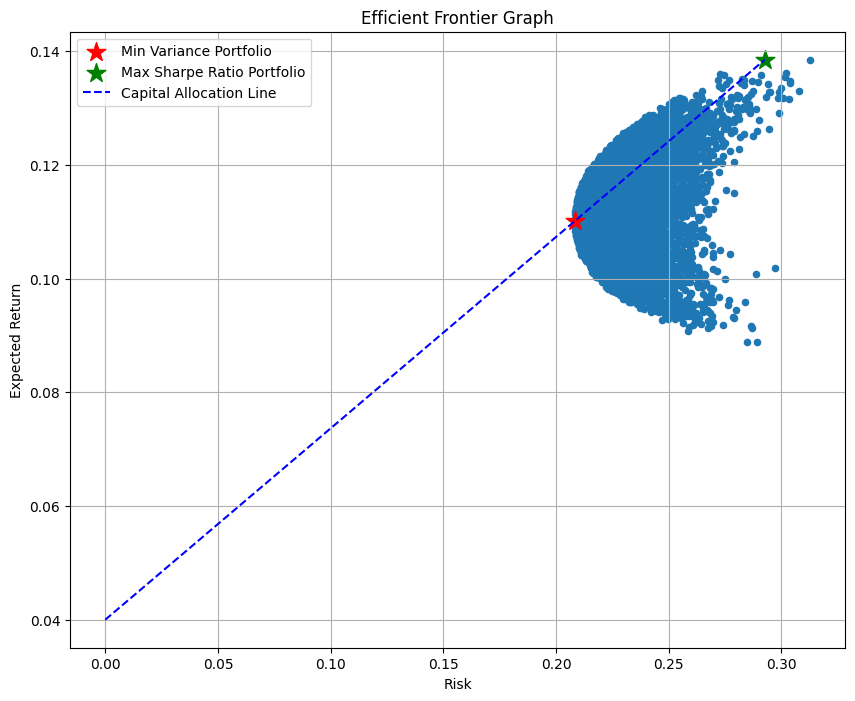

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 시가총액 5순위 주식과 연간 수익률, 연간 공분산 설정
stocks = ['Stock A', 'Stock B', 'Stock C', 'Stock D', 'Stock E']
annual_ret = [0.12, 0.08, 0.10, 0.15, 0.11]  # 연간 수익률
annual_cov = np.array([[0.1, 0.05, 0.03, 0.02, 0.01],
                       [0.05, 0.12, 0.04, 0.03, 0.02],
                       [0.03, 0.04, 0.11, 0.02, 0.01],
                       [0.02, 0.03, 0.02, 0.15, 0.06],
                       [0.01, 0.02, 0.01, 0.06, 0.1]])

# 시가총액 5순위 주식의 비율을 다르게 하여 20,000개 포트폴리오 생성
port_ret = []
port_risk = []
port_weights = []

for i in range(20000):
    # 랜덤 숫자 4개 생성 - 합이 1이 되도록 생성
    weights = np.random.random(len(stocks))
    weights /= np.sum(weights)

    # 랜덤 생성된 종목별 비중 배열과 종목별 연간 수익률을 곱해 포트폴리오의 전체 수익률(returns)를 구함
    returns = np.dot(weights, annual_ret)

    # 종목별 연간공분산과 종목별 비중배열 곱하고, 다시 종목별 비중의 전치로 곱함
    # 결과값의 제곱근을 sqrt()함수로 구하면 해당 포트폴리오 전체 risk가 구해짐
    risk = np.sqrt(np.dot(weights.T, np.dot(annual_cov, weights)))

    # 포트폴리오의 수익률, 리스크, 종목별 비중을 각각 리스트에 추가함
    port_ret.append(returns)
    port_risk.append(risk)
    port_weights.append(weights)

# DataFrame 생성
portfolio = {'Returns': port_ret, 'Risk': port_risk}
for j, s in enumerate(stocks):
    portfolio[s] = [weight[j] for weight in port_weights]

df = pd.DataFrame(portfolio)

# Efficient Frontier 그래프 그리기
df.plot.scatter(x='Risk', y='Returns', figsize=(10, 8), grid=True)
plt.title('Efficient Frontier Graph')
plt.xlabel('Risk')
plt.ylabel('Expected Return')

# 최소 분산 포트폴리오 찾기
min_variance_idx = df['Risk'].idxmin()
plt.scatter(df.loc[min_variance_idx, 'Risk'], df.loc[min_variance_idx, 'Returns'], marker='*', color='r', s=200, label='Min Variance Portfolio')

# 최대 샤프 비율 포트폴리오 찾기
max_sharpe_ratio_idx = df['Returns'].idxmax()
max_sharpe_ratio_return = df.loc[max_sharpe_ratio_idx, 'Returns']
max_sharpe_ratio_risk = df.loc[max_sharpe_ratio_idx, 'Risk']
max_sharpe_ratio = (max_sharpe_ratio_return - 0.04) / max_sharpe_ratio_risk
plt.scatter(max_sharpe_ratio_risk, max_sharpe_ratio_return, marker='*', color='g', s=200, label='Max Sharpe Ratio Portfolio')

# 무위험 자산 수익률
risk_free_rate = 0.04

# 최대 샤프 비율 포트폴리오와 무위험 자산 사이의 자산배분선
x_values = np.linspace(0, max_sharpe_ratio_risk, num=100)
y_values = max_sharpe_ratio * x_values + risk_free_rate
plt.plot(x_values, y_values, linestyle='--', color='b', label='Capital Allocation Line')

plt.legend()
plt.show()


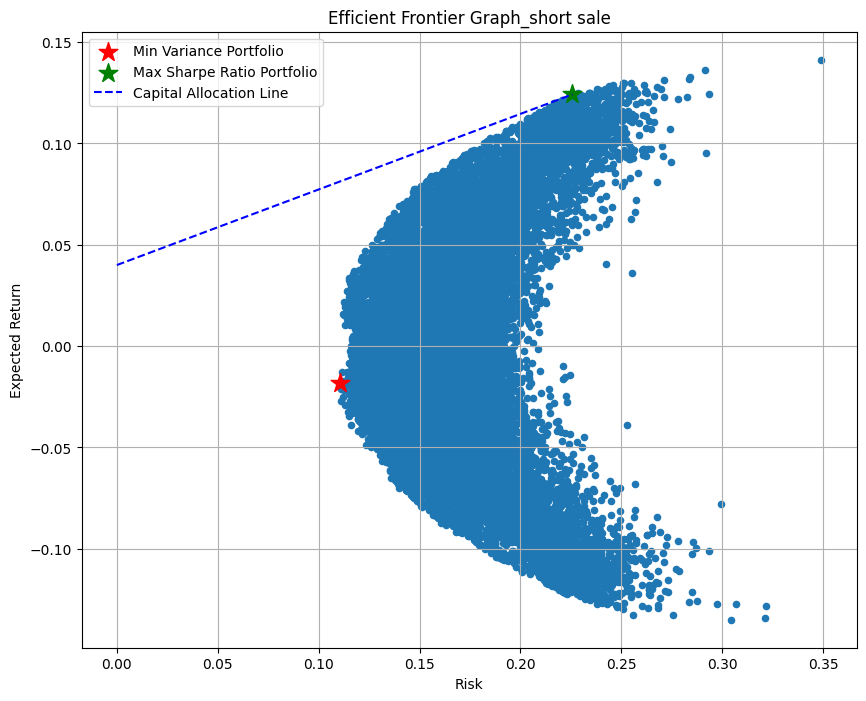

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 시가총액 5순위 주식과 연간 수익률, 연간 공분산 설정
stocks = ['Stock A', 'Stock B', 'Stock C', 'Stock D', 'Stock E']
annual_ret = [0.12, 0.08, 0.10, 0.15, 0.11]  # 연간 수익률
annual_cov = np.array([[0.1, 0.05, 0.03, 0.02, 0.01],
                       [0.05, 0.12, 0.04, 0.03, 0.02],
                       [0.03, 0.04, 0.11, 0.02, 0.01],
                       [0.02, 0.03, 0.02, 0.15, 0.06],
                       [0.01, 0.02, 0.01, 0.06, 0.1]])

# 시가총액 5순위 주식의 비율을 다르게 하여 20,000개 포트폴리오 생성
port_ret = []
port_risk = []
port_weights = []

for i in range(20000):
    # 랜덤 숫자 4개 생성 - 각 원소는 -1부터 1 사이 값이 되도록 생성
    weights = np.random.uniform(-1, 1, len(stocks))  # -1에서 1 사이의 값으로 생성
    weights /= np.sum(np.abs(weights))  # 각 값의 절대값으로 나누어 전체 합이 1이 되도록 함


    # 랜덤 생성된 종목별 비중 배열과 종목별 연간 수익률을 곱해 포트폴리오의 전체 수익률(returns)를 구함
    returns = np.dot(weights, annual_ret)

    # 종목별 연간공분산과 종목별 비중배열 곱하고, 다시 종목별 비중의 전치로 곱함
    # 결과값의 제곱근을 sqrt()함수로 구하면 해당 포트폴리오 전체 risk가 구해짐
    risk = np.sqrt(np.dot(weights.T, np.dot(annual_cov, weights)))

    # 포트폴리오의 수익률, 리스크, 종목별 비중을 각각 리스트에 추가함
    port_ret.append(returns)
    port_risk.append(risk)
    port_weights.append(weights)

# DataFrame 생성
portfolio = {'Returns': port_ret, 'Risk': port_risk}
for j, s in enumerate(stocks):
    portfolio[s] = [weight[j] for weight in port_weights]

df = pd.DataFrame(portfolio)

# Efficient Frontier 그래프 그리기
df.plot.scatter(x='Risk', y='Returns', figsize=(10, 8), grid=True)
plt.title('Efficient Frontier Graph_short sale')
plt.xlabel('Risk')
plt.ylabel('Expected Return')

# 최소 분산 포트폴리오 찾기
min_variance_idx = df['Risk'].idxmin()
plt.scatter(df.loc[min_variance_idx, 'Risk'], df.loc[min_variance_idx, 'Returns'], marker='*', color='r', s=200, label='Min Variance Portfolio')

# 최대 샤프 비율 포트폴리오 찾기
sharpe_ratio = (df['Returns'] - 0.04) / df['Risk']  # 샤프 비율 계산
max_sharpe_ratio_idx = sharpe_ratio.idxmax()  # 최대 샤프 비율의 인덱스 찾기
plt.scatter(df.loc[max_sharpe_ratio_idx, 'Risk'], df.loc[max_sharpe_ratio_idx, 'Returns'], marker='*', color='g', s=200, label='Max Sharpe Ratio Portfolio')

# 무위험 자산 수익률
risk_free_rate = 0.04

# 최대 샤프 비율 포트폴리오와 무위험 자산 사이의 자산배분선
x_values = np.linspace(0, df.loc[max_sharpe_ratio_idx, 'Risk'], num=100)
y_values = (df.loc[max_sharpe_ratio_idx, 'Returns'] - risk_free_rate) / df.loc[max_sharpe_ratio_idx, 'Risk'] * x_values + risk_free_rate
plt.plot(x_values, y_values, linestyle='--', color='b', label='Capital Allocation Line')

plt.legend()
plt.show()


In [23]:
df.head()

,Returns,Risk,weight,Stock A,Stock B,Stock C,Stock D,Stock E
0,0.072992,0.219825,"[0.3880820558476661, 0.12192412979762991, 0.20...",0.388082,0.121924,0.208874,0.171066,0.110054
1,0.082832,0.226617,"[0.10859761109554561, 0.29801091712044886, 0.2...",0.108598,0.298011,0.233673,0.236469,0.123250
2,0.089827,0.230740,"[0.009559745119977371, 0.3353379639867205, 0.1...",0.009560,0.335338,0.183624,0.219403,0.252075
3,0.089830,0.263784,"[0.015379424215104118, 0.4115983836407954, 0.0...",0.015379,0.411598,0.064540,0.431736,0.076747
4,0.078758,0.220076,"[0.26558207263256417, 0.3073015212152579, 0.15...",0.265582,0.307302,0.150099,0.008433,0.268585


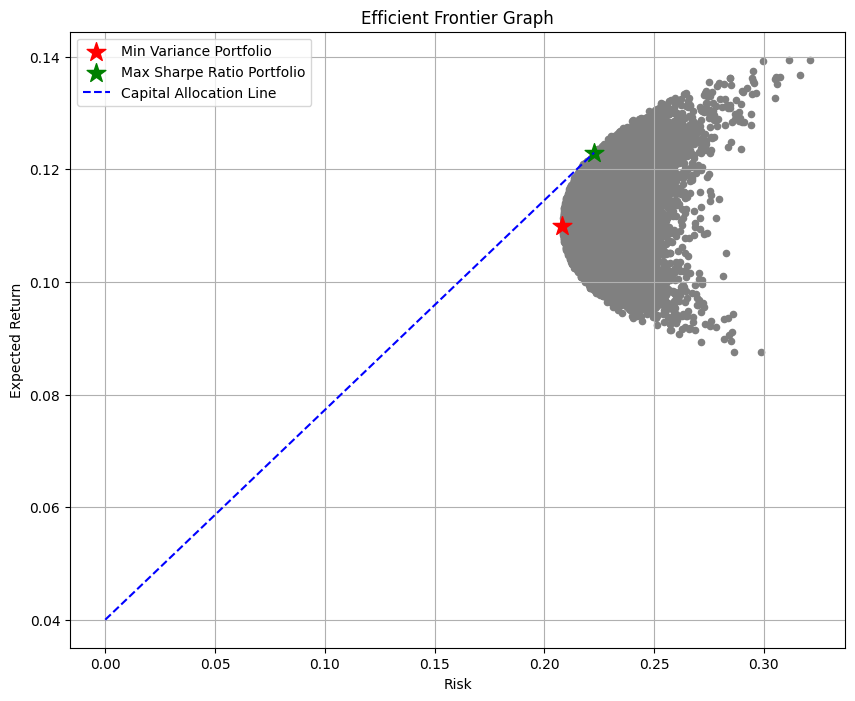

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 시가총액 5순위 주식과 연간 수익률, 연간 공분산 설정
stocks = ['Stock A', 'Stock B', 'Stock C', 'Stock D', 'Stock E']
annual_ret = [0.12, 0.08, 0.10, 0.15, 0.11]  # 연간 수익률
annual_cov = np.array([[0.1, 0.05, 0.03, 0.02, 0.01],
                       [0.05, 0.12, 0.04, 0.03, 0.02],
                       [0.03, 0.04, 0.11, 0.02, 0.01],
                       [0.02, 0.03, 0.02, 0.15, 0.06],
                       [0.01, 0.02, 0.01, 0.06, 0.1]])

# 각 주식별 최소/최대 weights 범위 설정


port_ret = []
port_risk = []
port_weights = []

for i in range(20000):
    # 랜덤 숫자 4개 생성 - 합이 1이 되도록 생성
    weights = np.random.random(len(stocks))
    weights /= np.sum(weights)

    # DataFrame에 저장
    port_weights.append(weights)
    # 포트폴리오의 수익률, 리스크 계산
    returns = np.dot(weights, annual_ret)
    risk = np.sqrt(np.dot(weights.T, np.dot(annual_cov, weights)))
    port_ret.append(returns)
    port_risk.append(risk)

# DataFrame 생성
portfolio = {'Returns': port_ret, 'Risk': port_risk}
for j, s in enumerate(stocks):
    portfolio[s] = [weight[j] for weight in port_weights]

df = pd.DataFrame(portfolio)

# Efficient Frontier 그래프 그리기
df.plot.scatter(x='Risk', y='Returns', figsize=(10, 8), color = 'gray', grid=True)
plt.title('Efficient Frontier Graph')
plt.xlabel('Risk')
plt.ylabel('Expected Return')

# 최소 분산 포트폴리오 찾기
min_variance_idx = df['Risk'].idxmin()
plt.scatter(df.loc[min_variance_idx, 'Risk'], df.loc[min_variance_idx, 'Returns'], marker='*', color='r', s=200, label='Min Variance Portfolio')

# 최대 샤프 비율 포트폴리오 찾기
sharpe_ratio = (df['Returns'] - 0.04) / df['Risk']  # 샤프 비율 계산
max_sharpe_ratio_idx = sharpe_ratio.idxmax()  # 최대 샤프 비율의 인덱스 찾기
plt.scatter(df.loc[max_sharpe_ratio_idx, 'Risk'], df.loc[max_sharpe_ratio_idx, 'Returns'], marker='*', color='g', s=200, label='Max Sharpe Ratio Portfolio')

# 무위험 자산 수익률
risk_free_rate = 0.04

# 최대 샤프 비율 포트폴리오와 무위험 자산 사이의 자산배분선
x_values = np.linspace(0, df.loc[max_sharpe_ratio_idx, 'Risk'], num=100)
y_values = (df.loc[max_sharpe_ratio_idx, 'Returns'] - risk_free_rate) / df.loc[max_sharpe_ratio_idx, 'Risk'] * x_values + risk_free_rate
plt.plot(x_values, y_values, linestyle='--', color='b', label='Capital Allocation Line')

plt.legend()
plt.show()
